In [9]:
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torchvision
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline


In [20]:
# THIS IS JUST FOR VIEWING IMAGES

image_size = 32

path_real = 'images/train/REAL/'
img_names_real = os.listdir(path_real)

path_fake = 'images/train/FAKE/'
img_names_fake = os.listdir(path_fake)

batch_size = 1000


X_train_real = []
X_train_fake = []
for i in range(batch_size):
    name_real = img_names_real[i]
    img_name = path_real + name_real
    image = plt.imread(img_name)
    X_train_real.append(image)

    name_fake = img_names_fake[i]
    img_name = path_fake + name_fake
    image = plt.imread(img_name)
    X_train_fake.append(image)

X_train_real = np.array(X_train_real)
X_train_fake = np.array(X_train_fake)
print(f"Shape of training data: {X_train_real.shape}")
print(f"Data type: {type(X_train_real)}")

Shape of training data: (1000, 32, 32, 3)
Data type: <class 'numpy.ndarray'>


In [18]:
# Actual Dataloader

base_path = "images/"
batch_size = 2

tranform_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor()
])

train_set = torchvision.datasets.ImageFolder(root=base_path + "train-small/", transform=tranform_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

test_set = torchvision.datasets.ImageFolder(root=base_path + "test/", transform=tranform_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size,
                                           shuffle=False)




In [19]:
from model_2 import FakeNet2
from tqdm import tqdm

# initialize parameters
cnn = FakeNet2()
cnn.train()
iterations = 10
learning_rate = 0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

print(len(train_loader))
# Train the Model
for epoch in tqdm(range(iterations)):
    for i, (images, labels) in enumerate(train_loader):
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        labels = labels.unsqueeze(1).float()
        loss = criterion(outputs,labels)
        loss.backward()
        print(i, loss)
        optimizer.step()
        

        if (i+1)%100 == 0:
            print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))


  0%|          | 0/10 [00:00<?, ?it/s]

1000
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
14 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
15 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
16 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
17 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
18 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)

 10%|█         | 1/10 [00:19<02:53, 19.22s/it]

999 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 1/10tensor(50.)
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
14 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
15 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
16 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
17 tensor(50., grad_fn=<BinaryCros

 20%|██        | 2/10 [00:37<02:32, 19.03s/it]

989 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
990 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
991 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
992 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
993 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
994 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
995 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 2/10tensor(100.)
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(50., g

 30%|███       | 3/10 [00:56<02:12, 18.98s/it]

992 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
993 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
994 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
995 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 3/10tensor(100.)
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(50., grad_fn=<Binary

 40%|████      | 4/10 [01:16<01:54, 19.09s/it]

996 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 4/10tensor(50.)
0 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
14 tensor(100., grad_fn=<Bina

 50%|█████     | 5/10 [01:34<01:35, 19.00s/it]

993 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
994 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
995 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 5/10tensor(0.)
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(0., grad_fn=<Binar

 60%|██████    | 6/10 [01:53<01:15, 18.96s/it]

993 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
994 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
995 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 6/10tensor(50.)
0 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(50., grad_fn=<Binary

 70%|███████   | 7/10 [02:12<00:56, 18.93s/it]

995 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 7/10tensor(100.)
0 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(0., grad_fn=<Bina

 80%|████████  | 8/10 [02:31<00:38, 19.01s/it]

995 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 8/10tensor(50.)
0 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(100., grad_fn=<Bi

 90%|█████████ | 9/10 [02:50<00:18, 18.82s/it]

998 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 9/10tensor(50.)
0 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
1 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
2 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
3 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
4 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
5 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
6 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
7 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
8 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
9 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
10 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
11 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
12 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
13 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
14 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
15 tensor(0., grad_fn=<BinaryCrossEntropyBackward>)
16 tensor(50., grad_fn=<BinaryCr

100%|██████████| 10/10 [03:08<00:00, 18.90s/it]

993 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
994 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
995 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
996 tensor(50., grad_fn=<BinaryCrossEntropyBackward>)
997 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
998 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
999 tensor(100., grad_fn=<BinaryCrossEntropyBackward>)
Epoch 10/10tensor(100.)


In [ ]:
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var)
correct = 0
total = 0

for images, labels in test_loader:
    outputs = cnn(images)
    print(outputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    print(correct)
    print(total)
print('Test Accuracy of the model on test images: %.6f%%' % (100.0*correct/total))


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<SoftmaxBackward>)
tensor(64)
64
tensor([[1.],
        [1.],
        [1.],
        [1.],
      

Text(0.5, 1.0, 'Image Number Fake: 12')

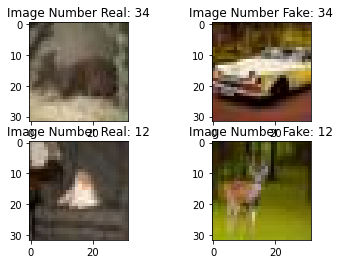

In [ ]:
img_index = np.random.randint(0, batch_size)
img_2_index = np.random.randint(0, batch_size)


figure, axis = plt.subplots(2, 2) 

axis[0, 0].imshow(X_train_real[img_index], interpolation='nearest')
axis[0, 0].set_title("Image Number Real: " + str(img_index)) 
  
axis[0, 1].imshow(X_train_fake[img_index], interpolation='nearest')
axis[0, 1].set_title("Image Number Fake: " + str(img_index)) 
  
axis[1, 0].imshow(X_train_real[img_2_index], interpolation='nearest')
axis[1, 0].set_title("Image Number Real: " + str(img_2_index)) 
  
axis[1, 1].imshow(X_train_fake[img_2_index], interpolation='nearest')
axis[1, 1].set_title("Image Number Fake: " + str(img_2_index)) 
